In [1]:
import numpy as np
dfa=np.load('s98_dfas_all_band.npy')

In [27]:
import numpy as np
hh=np.array([32,34,35,36,38,39,40,41,43,44,45,46,48,49,50,51,52,53,54,55,62,63,64,
             68,69,70,71,72,73,75,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,96,97,98])
beh_all=np.empty((0,2))
for i in range(48):
    c_c=np.load('s'+str(hh[i])+'behaviour_score.npy')
    c_c=c_c.reshape((1,c_c.shape[0]))
    beh_all=np.append(beh_all,c_c,axis=0)
    stric=stats.zscore(beh_all[:,0])

In [25]:
import numpy as np
from scipy import stats
hh=np.array([32,34,35,36,38,39,40,41,43,44,45,46,48,49,50,51,52,53,54,55,62,63,64,
             68,69,70,71,72,73,75,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,96,97,98])
dfa=np.empty((0,168))
for i in range(48):
    cc=np.load('s'+str(hh[i])+'_dfas_all_band.npy')
    cc=cc.reshape((1,168))
    dfa=np.append(dfa,cc,axis=0)

In [29]:
normalized_dfa=np.empty((48,168))   
for n in range(168):
    normalized_dfa[:,n]=stats.zscore(dfa[:,n])

In [30]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
vv=np.empty((168))
for ii in range(168):
    h1=scipy.stats.pearsonr(stric, normalized_dfa[:,ii])  
    corr=h1[0]
    vv[ii]=corr
    
signif=np.argwhere(vv>0.3)
print(signif)

[[ 17]
 [143]
 [144]]


In [31]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
vv=np.empty((168))
for ii in range(168):
    h1=scipy.stats.mstats.spearmanr(stric, normalized_dfa[:,ii])  
    corr=h1[0]
    vv[ii]=corr
    
signif=np.argwhere(vv>0.3)
print(signif)

[[ 17]
 [144]]


1.2493054154435843 -0.2493054154435843


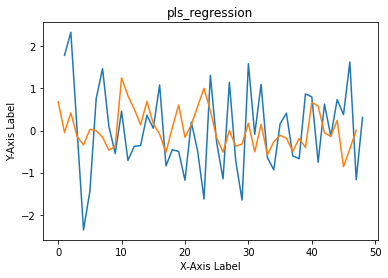

1.2493054154435843 <function r2_score at 0x000001E8EAA974C0>


In [32]:

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sys import stdout
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
# Define PLS object
pls = PLSRegression(n_components=1)
 
# Fit
pls.fit(normalized_dfa, stric)
 
# Cross-validation
y_cv = cross_val_predict(pls,normalized_dfa, stric, cv=5)
 
# Calculate scores
score = r2_score(stric, y_cv)
mse = mean_squared_error(stric, y_cv)
print(mse, score)
from sklearn.metrics import r2_score


fig = plt.figure()

# Creating subplot/axes
ax = fig.add_subplot(111)

# Setting axes/plot title
ax.set_title('pls_regression')

plt.plot(range(1,49,1), stric,y_cv )
# Setting X-axis and Y-axis labels
ax.set_ylabel('Y-Axis Label')
ax.set_xlabel('X-Axis Label')

# Showing the plot
plt.show()
print(mse, r2_score)

(8,)

(7, 21, 21)